In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import math
import scienceplots

device = torch.device('cpu')

SEED = 1234  #固定种子，大家都可以重复结果
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True

x = torch.unsqueeze(torch.linspace(-2, 10, 19), dim=1).to(device)
y = np.exp(-(x - 2) ** 2) + np.exp(-(x - 6) ** 2 / 10) + 1 / (x ** 2 + 1) + 0.12 * torch.randn(x.size()).to(
    device)  # 这里是污染数据固定不变当成训练数据

# 读取 CSV 文件中的数据
data = np.loadtxt('D:/PycharmProjects/保存的参数/FOrestes（1）mean_response.csv', delimiter=',', skiprows=1)
x_respond_loaded_data = data[:, 0]
mean_response_loaded_data = data[:, 1]

# 读取 CSV 文件中的数据
data = np.loadtxt('D:/PycharmProjects/保存的参数/FOrestes（2）mean_response.csv', delimiter=',', skiprows=1)
x_respond_loaded_lable = data[:, 0]
mean_response_lable = data[:, 1]

Failed to find a Ghostscript installation.  Distillation step skipped.


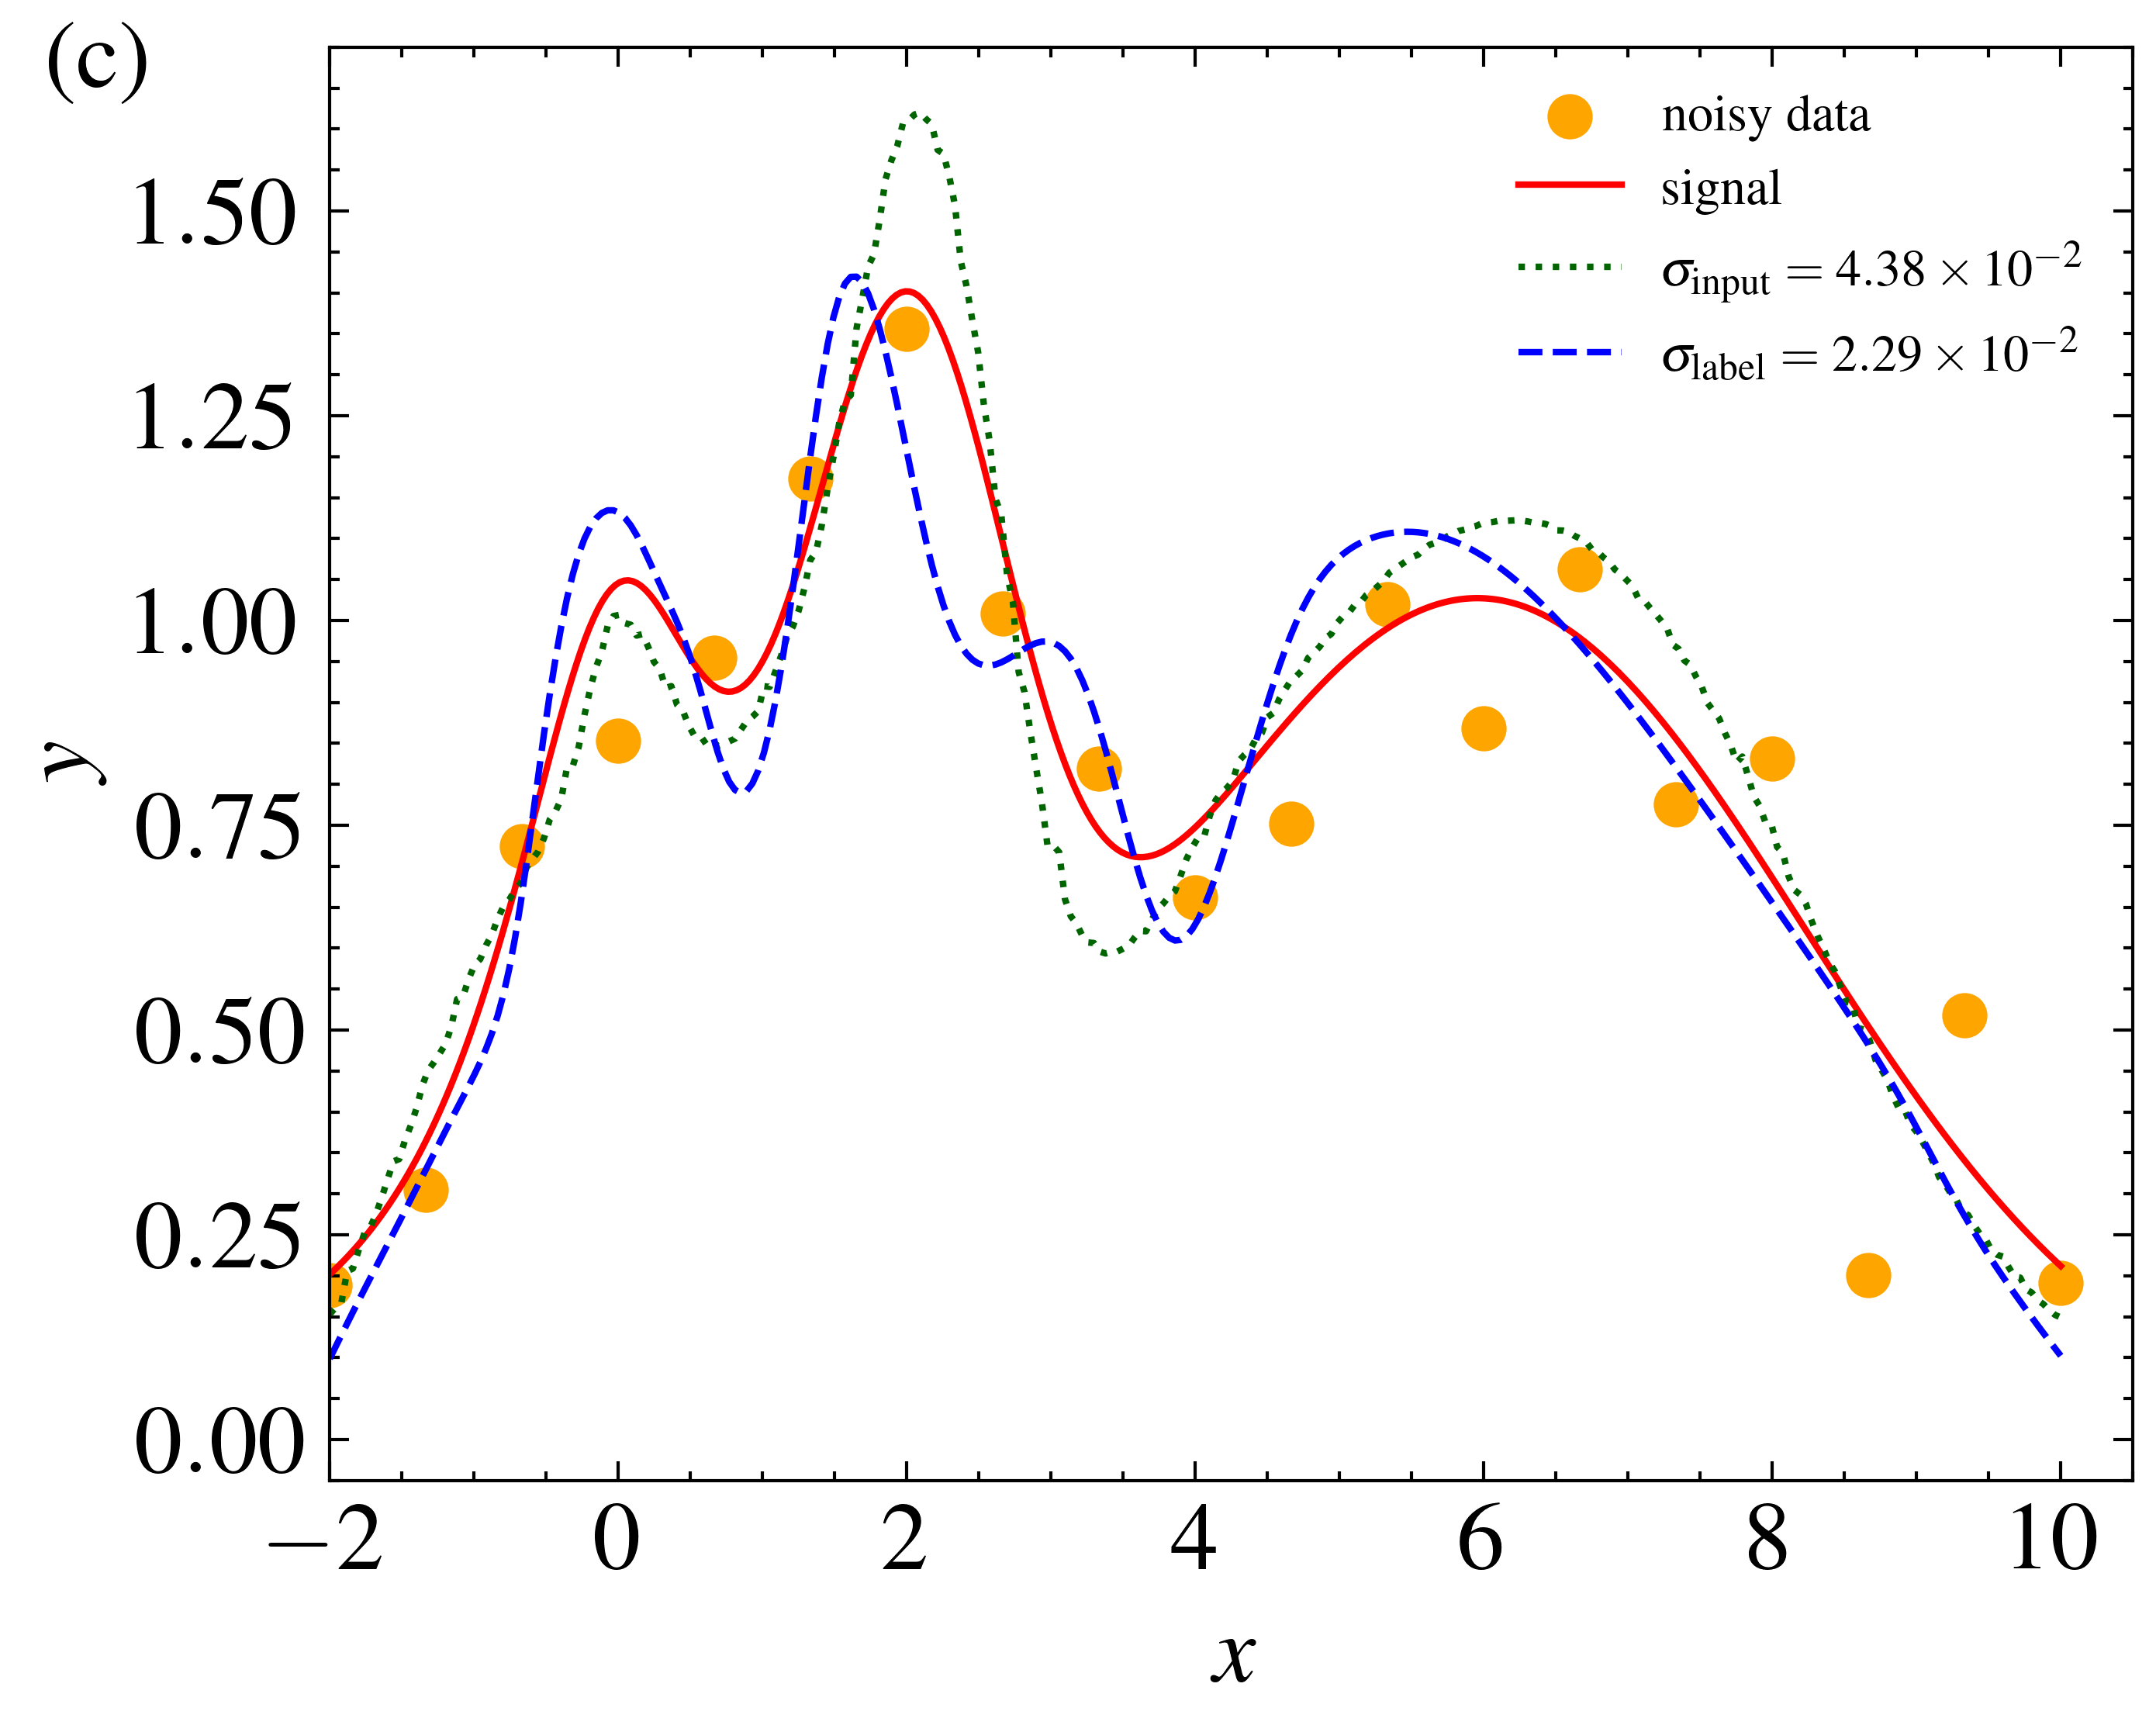

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots

# Configure plot settings
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = True
plt.style.use(['science', 'ieee'])
plt.rcParams['text.usetex'] = True

# Generate figure and axis
fig, ax = plt.subplots(figsize=(5, 4))
plt.cla()
plt.tick_params(labelsize=15)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
ax.set_xlim(-2, 10.5)
ax.set_ylim(-0.05, 1.7)
# Ensure x-axis shows -2
plt.xticks(np.arange(-2, 10.5, step=2))  # 手动设置x轴刻度

# Scatter plot for training set
ax.scatter(x.data.numpy(), y.data.numpy(), color="orange", label='noisy data')

input = torch.unsqueeze(torch.linspace(-2, 10, 401), dim=1)
signal = np.exp(-(input - 2)**2) + np.exp(-(input - 6)**2 / 10) + 1 / (input**2 + 1)
plt.plot(input, signal, label='signal', color='red', linestyle='-')

# 绘制从 CSV 文件中读取的数据
plt.plot(x_respond_loaded_data, mean_response_loaded_data, label='$\sigma_{\mathrm{input}}=4.38 \\times 10^{-2}$', color='#006400', linestyle=':')

# 绘制从 CSV 文件中读取的数据
plt.plot(x_respond_loaded_lable, mean_response_lable, label='$\sigma_{\mathrm{label}}=2.29 \\times 10^{-2}$', color='blue', linestyle='--')

ax.text(-3.95, 1.65, '(c)',fontdict={'size': 15, 'color':  'black'})
plt.legend()
plt.savefig('D:/PycharmProjects/保存的参数/Fig.2(c).eps',format='eps')
plt.show()